# 데이터 불러오기 + 시각화

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

data_zip = zipfile.ZipFile('/content/drive/MyDrive/dmp/dataset.zip')
data_zip.extractall('/content/drive/MyDrive/dmp')
 
data_zip.close()

In [ ]:
import pandas as pd

media_info = pd.read_csv('/content/drive/MyDrive/dmp/dataset/data/Media/Media_INFO.csv')
media_login = pd.read_csv('/content/drive/MyDrive/dmp/dataset/data/Media/Media_LOGIN.csv')
media_menu = pd.read_csv('/content/drive/MyDrive/dmp/dataset/data/Media/Media_MENU.csv')
media_stream = pd.read_csv('/content/drive/MyDrive/dmp/dataset/data/Media/Media_STREAM.csv')

In [ ]:
media_info.isnull().sum()

Timestamp              0
INFO-01-Request    17991
INFO-01-Success    17991
INFO-01-Fail       17991
dtype: int64

In [ ]:
media_login.isnull().sum()

Timestamp               0
LOGIN-01-Request      677
LOGIN-01-Success      677
LOGIN-01-Fail         677
LOGIN-02-Request    18049
LOGIN-02-Success    18049
LOGIN-02-Fail       18049
LOGIN-03-Request    18049
LOGIN-03-Success    18049
LOGIN-03-Fail       18049
LOGIN-04-Request      677
LOGIN-04-Success      677
LOGIN-04-Fail         677
LOGIN-05-Request      677
LOGIN-05-Success      677
LOGIN-05-Fail         677
dtype: int64

In [ ]:
media_menu.isnull().sum()

Timestamp            0
MENU-01-Request    469
MENU-01-Success    469
MENU-01-Fail       469
MENU-02-Request    469
MENU-02-Success    469
MENU-02-Fail       469
MENU-03-Request    469
MENU-03-Success    469
MENU-03-Fail       469
MENU-04-Request    469
MENU-04-Success    469
MENU-04-Fail       469
dtype: int64

In [ ]:
media_stream.isnull().sum()

Timestamp                0
STREAM-01-Session    31509
STREAM-02-Session    31510
STREAM-03-Session      458
dtype: int64

In [ ]:
print(media_menu['Timestamp'])
print(media_stream['Timestamp'])
print(media_info['Timestamp'])
print(media_login['Timestamp'])

0         20170101_0000-0005
1         20170101_0005-0010
2         20170101_0010-0015
3         20170101_0015-0020
4         20170101_0020-0025
                 ...        
210235    20181231_2335-2340
210236    20181231_2340-2345
210237    20181231_2345-2350
210238    20181231_2350-2355
210239    20181231_2355-0000
Name: Timestamp, Length: 210240, dtype: object
0         20170101_0000-0005
1         20170101_0005-0010
2         20170101_0010-0015
3         20170101_0015-0020
4         20170101_0020-0025
                 ...        
210235    20181231_2335-2340
210236    20181231_2340-2345
210237    20181231_2345-2350
210238    20181231_2350-2355
210239    20181231_2355-0000
Name: Timestamp, Length: 210240, dtype: object
0         20170101_0000-0005
1         20170101_0005-0010
2         20170101_0010-0015
3         20170101_0015-0020
4         20170101_0020-0025
                 ...        
210235    20181231_2335-2340
210236    20181231_2340-2345
210237    20181231_2345-2350
210238 

In [ ]:
from functools import reduce

data_list = [media_info,media_login,media_menu,media_stream]

media = reduce(lambda l, r: pd.merge(l,r,on='Timestamp'),data_list)
media

,Timestamp,INFO-01-Request,INFO-01-Success,INFO-01-Fail,LOGIN-01-Request,LOGIN-01-Success,LOGIN-01-Fail,LOGIN-02-Request,LOGIN-02-Success,LOGIN-02-Fail,...,MENU-02-Fail,MENU-03-Request,MENU-03-Success,MENU-03-Fail,MENU-04-Request,MENU-04-Success,MENU-04-Fail,STREAM-01-Session,STREAM-02-Session,STREAM-03-Session
0,20170101_0000-0005,NaN,NaN,NaN,4405.0,4292.0,113.0,NaN,NaN,NaN,...,51.0,6477.0,6418.0,59.0,6518.0,6472.0,46.0,NaN,NaN,317.0
1,20170101_0005-0010,NaN,NaN,NaN,2260.0,2208.0,52.0,NaN,NaN,NaN,...,21.0,2891.0,2860.0,31.0,2765.0,2747.0,18.0,NaN,NaN,195.0
2,20170101_0010-0015,NaN,NaN,NaN,1648.0,1623.0,25.0,NaN,NaN,NaN,...,33.0,3884.0,3842.0,42.0,3990.0,3934.0,56.0,NaN,NaN,171.0
3,20170101_0015-0020,NaN,NaN,NaN,1407.0,1387.0,20.0,NaN,NaN,NaN,...,30.0,2718.0,2685.0,33.0,2561.0,2525.0,36.0,NaN,NaN,158.0
4,20170101_0020-0025,NaN,NaN,NaN,1374.0,1351.0,23.0,NaN,NaN,NaN,...,28.0,2450.0,2409.0,41.0,2389.0,2375.0,14.0,NaN,NaN,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210235,20181231_2335-2340,4988.0,4988.0,0.0,4081.0,3925.0,156.0,4076.0,3933.0,143.0,...,42.0,5473.0,5432.0,41.0,5491.0,5443.0,48.0,193.0,192.0,198.0
210236,20181231_2340-2345,5807.0,5807.0,0.0,4322.0,4182.0,140.0,4325.0,4180.0,145.0,...,33.0,6109.0,6076.0,33.0,6338.0,6282.0,56.0,198.0,238.0,225.0
210237,20181231_2345-2350,5716.0,5716.0,0.0,4531.0,4355.0,176.0,4528.0,4345.0,183.0,...,48.0,6551.0,6520.0,31.0,6537.0,6487.0,50.0,192.0,191.0,232.0
210238,20181231_2350-2355,5952.0,5952.0,0.0,5633.0,5399.0,234.0,5636.0,5442.0,194.0,...,65.0,7822.0,7763.0,59.0,7960.0,7891.0,69.0,194.0,192.0,261.0


In [ ]:
media.isna().sum()

Timestamp                0
INFO-01-Request      17991
INFO-01-Success      17991
INFO-01-Fail         17991
LOGIN-01-Request       677
LOGIN-01-Success       677
LOGIN-01-Fail          677
LOGIN-02-Request     18049
LOGIN-02-Success     18049
LOGIN-02-Fail        18049
LOGIN-03-Request     18049
LOGIN-03-Success     18049
LOGIN-03-Fail        18049
LOGIN-04-Request       677
LOGIN-04-Success       677
LOGIN-04-Fail          677
LOGIN-05-Request       677
LOGIN-05-Success       677
LOGIN-05-Fail          677
MENU-01-Request        469
MENU-01-Success        469
MENU-01-Fail           469
MENU-02-Request        469
MENU-02-Success        469
MENU-02-Fail           469
MENU-03-Request        469
MENU-03-Success        469
MENU-03-Fail           469
MENU-04-Request        469
MENU-04-Success        469
MENU-04-Fail           469
STREAM-01-Session    31509
STREAM-02-Session    31510
STREAM-03-Session      458
dtype: int64

In [ ]:
import datetime

media['Timestamp'] = media['Timestamp'].str.slice(start=0,stop=13)
media['Timestamp'] = pd.to_datetime(media['Timestamp'],format='%Y%m%d_%H%M')

In [ ]:
media = media.set_index('Timestamp')

In [ ]:
media

,INFO-01-Request,INFO-01-Success,INFO-01-Fail,LOGIN-01-Request,LOGIN-01-Success,LOGIN-01-Fail,LOGIN-02-Request,LOGIN-02-Success,LOGIN-02-Fail,LOGIN-03-Request,...,MENU-02-Fail,MENU-03-Request,MENU-03-Success,MENU-03-Fail,MENU-04-Request,MENU-04-Success,MENU-04-Fail,STREAM-01-Session,STREAM-02-Session,STREAM-03-Session
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,NaN,NaN,NaN,4405.0,4292.0,113.0,NaN,NaN,NaN,NaN,...,51.0,6477.0,6418.0,59.0,6518.0,6472.0,46.0,NaN,NaN,317.0
2017-01-01 00:05:00,NaN,NaN,NaN,2260.0,2208.0,52.0,NaN,NaN,NaN,NaN,...,21.0,2891.0,2860.0,31.0,2765.0,2747.0,18.0,NaN,NaN,195.0
2017-01-01 00:10:00,NaN,NaN,NaN,1648.0,1623.0,25.0,NaN,NaN,NaN,NaN,...,33.0,3884.0,3842.0,42.0,3990.0,3934.0,56.0,NaN,NaN,171.0
2017-01-01 00:15:00,NaN,NaN,NaN,1407.0,1387.0,20.0,NaN,NaN,NaN,NaN,...,30.0,2718.0,2685.0,33.0,2561.0,2525.0,36.0,NaN,NaN,158.0
2017-01-01 00:20:00,NaN,NaN,NaN,1374.0,1351.0,23.0,NaN,NaN,NaN,NaN,...,28.0,2450.0,2409.0,41.0,2389.0,2375.0,14.0,NaN,NaN,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:35:00,4988.0,4988.0,0.0,4081.0,3925.0,156.0,4076.0,3933.0,143.0,4079.0,...,42.0,5473.0,5432.0,41.0,5491.0,5443.0,48.0,193.0,192.0,198.0
2018-12-31 23:40:00,5807.0,5807.0,0.0,4322.0,4182.0,140.0,4325.0,4180.0,145.0,4326.0,...,33.0,6109.0,6076.0,33.0,6338.0,6282.0,56.0,198.0,238.0,225.0
2018-12-31 23:45:00,5716.0,5716.0,0.0,4531.0,4355.0,176.0,4528.0,4345.0,183.0,4522.0,...,48.0,6551.0,6520.0,31.0,6537.0,6487.0,50.0,192.0,191.0,232.0


In [ ]:
print(media.max())

INFO-01-Request       5952.0
INFO-01-Success       5952.0
INFO-01-Fail             0.0
LOGIN-01-Request     11503.0
LOGIN-01-Success     11234.0
LOGIN-01-Fail         2177.0
LOGIN-02-Request     11502.0
LOGIN-02-Success     10920.0
LOGIN-02-Fail         4288.0
LOGIN-03-Request     11499.0
LOGIN-03-Success     11234.0
LOGIN-03-Fail         4235.0
LOGIN-04-Request     11495.0
LOGIN-04-Success     11263.0
LOGIN-04-Fail         2299.0
LOGIN-05-Request     11503.0
LOGIN-05-Success     11224.0
LOGIN-05-Fail         2203.0
MENU-01-Request      24663.0
MENU-01-Success      24584.0
MENU-01-Fail          1157.0
MENU-02-Request      24893.0
MENU-02-Success      24759.0
MENU-02-Fail           856.0
MENU-03-Request      24768.0
MENU-03-Success      24652.0
MENU-03-Fail           818.0
MENU-04-Request      24942.0
MENU-04-Success      24806.0
MENU-04-Fail          1041.0
STREAM-01-Session     1007.0
STREAM-02-Session      927.0
STREAM-03-Session      782.0
dtype: float64


In [ ]:
media.describe()

,INFO-01-Request,INFO-01-Success,INFO-01-Fail,LOGIN-01-Request,LOGIN-01-Success,LOGIN-01-Fail,LOGIN-02-Request,LOGIN-02-Success,LOGIN-02-Fail,LOGIN-03-Request,...,MENU-02-Fail,MENU-03-Request,MENU-03-Success,MENU-03-Fail,MENU-04-Request,MENU-04-Success,MENU-04-Fail,STREAM-01-Session,STREAM-02-Session,STREAM-03-Session
count,192249.000000,192249.000000,192249.0,209563.000000,209563.000000,209563.000000,192191.000000,192191.000000,192191.000000,192191.000000,...,209771.000000,209771.000000,209771.000000,209771.000000,209771.000000,209771.000000,209771.000000,178731.000000,178730.000000,209782.000000
mean,652.933035,652.933035,0.0,867.511708,832.565281,34.946427,870.019741,833.147889,36.871851,870.035902,...,17.617983,2266.175849,2248.552259,17.623590,2265.813883,2248.181870,17.632013,230.070777,293.673826,126.540585
std,400.472742,400.472742,0.0,554.134695,532.449705,44.918976,561.375468,538.678981,47.415618,561.565109,...,15.184931,1233.615763,1226.991766,15.156172,1233.142813,1226.477966,15.329928,117.847697,183.603586,61.666424
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,346.000000,346.000000,0.0,427.000000,416.000000,8.000000,422.000000,410.000000,9.000000,422.000000,...,8.000000,1348.000000,1337.000000,8.000000,1347.000000,1336.000000,8.000000,128.000000,129.000000,86.000000
50%,593.000000,593.000000,0.0,781.000000,751.000000,19.000000,783.000000,751.000000,21.000000,783.000000,...,14.000000,2127.000000,2108.000000,14.000000,2127.000000,2108.000000,14.000000,220.000000,223.000000,116.000000
75%,884.000000,884.000000,0.0,1182.000000,1123.000000,42.000000,1186.000000,1123.000000,45.000000,1186.000000,...,23.000000,2994.000000,2968.000000,23.000000,2994.000000,2968.000000,23.000000,315.000000,467.000000,156.000000
max,5952.000000,5952.000000,0.0,11503.000000,11234.000000,2177.000000,11502.000000,10920.000000,4288.000000,11499.000000,...,856.000000,24768.000000,24652.000000,818.000000,24942.000000,24806.000000,1041.000000,1007.000000,927.000000,782.000000


In [ ]:
import matplotlib.pyplot as plt


for i in media.columns:
  plt.figure(figsize=(300,8))
  media[i].plot()
  plt.show()

In [ ]:
train_media = media.iloc[:105120,:]
train_media

,INFO-01-Request,INFO-01-Success,INFO-01-Fail,LOGIN-01-Request,LOGIN-01-Success,LOGIN-01-Fail,LOGIN-02-Request,LOGIN-02-Success,LOGIN-02-Fail,LOGIN-03-Request,...,MENU-02-Fail,MENU-03-Request,MENU-03-Success,MENU-03-Fail,MENU-04-Request,MENU-04-Success,MENU-04-Fail,STREAM-01-Session,STREAM-02-Session,STREAM-03-Session
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,NaN,NaN,NaN,4405.0,4292.0,113.0,NaN,NaN,NaN,NaN,...,51.0,6477.0,6418.0,59.0,6518.0,6472.0,46.0,NaN,NaN,317.0
2017-01-01 00:05:00,NaN,NaN,NaN,2260.0,2208.0,52.0,NaN,NaN,NaN,NaN,...,21.0,2891.0,2860.0,31.0,2765.0,2747.0,18.0,NaN,NaN,195.0
2017-01-01 00:10:00,NaN,NaN,NaN,1648.0,1623.0,25.0,NaN,NaN,NaN,NaN,...,33.0,3884.0,3842.0,42.0,3990.0,3934.0,56.0,NaN,NaN,171.0
2017-01-01 00:15:00,NaN,NaN,NaN,1407.0,1387.0,20.0,NaN,NaN,NaN,NaN,...,30.0,2718.0,2685.0,33.0,2561.0,2525.0,36.0,NaN,NaN,158.0
2017-01-01 00:20:00,NaN,NaN,NaN,1374.0,1351.0,23.0,NaN,NaN,NaN,NaN,...,28.0,2450.0,2409.0,41.0,2389.0,2375.0,14.0,NaN,NaN,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 23:35:00,2260.0,2260.0,0.0,2213.0,1906.0,307.0,2212.0,1918.0,294.0,2215.0,...,58.0,3777.0,3735.0,42.0,3832.0,3787.0,45.0,432.0,584.0,222.0
2017-12-31 23:40:00,2139.0,2139.0,0.0,2186.0,1926.0,260.0,2187.0,1924.0,263.0,2186.0,...,43.0,3647.0,3593.0,54.0,3633.0,3566.0,67.0,436.0,583.0,223.0
2017-12-31 23:45:00,2170.0,2170.0,0.0,2330.0,2045.0,285.0,2327.0,2030.0,297.0,2328.0,...,65.0,3932.0,3879.0,53.0,3960.0,3893.0,67.0,441.0,602.0,244.0


In [ ]:
for i in train_media.columns:
  plt.figure(figsize=(150,8))
  train_media[i].plot()
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

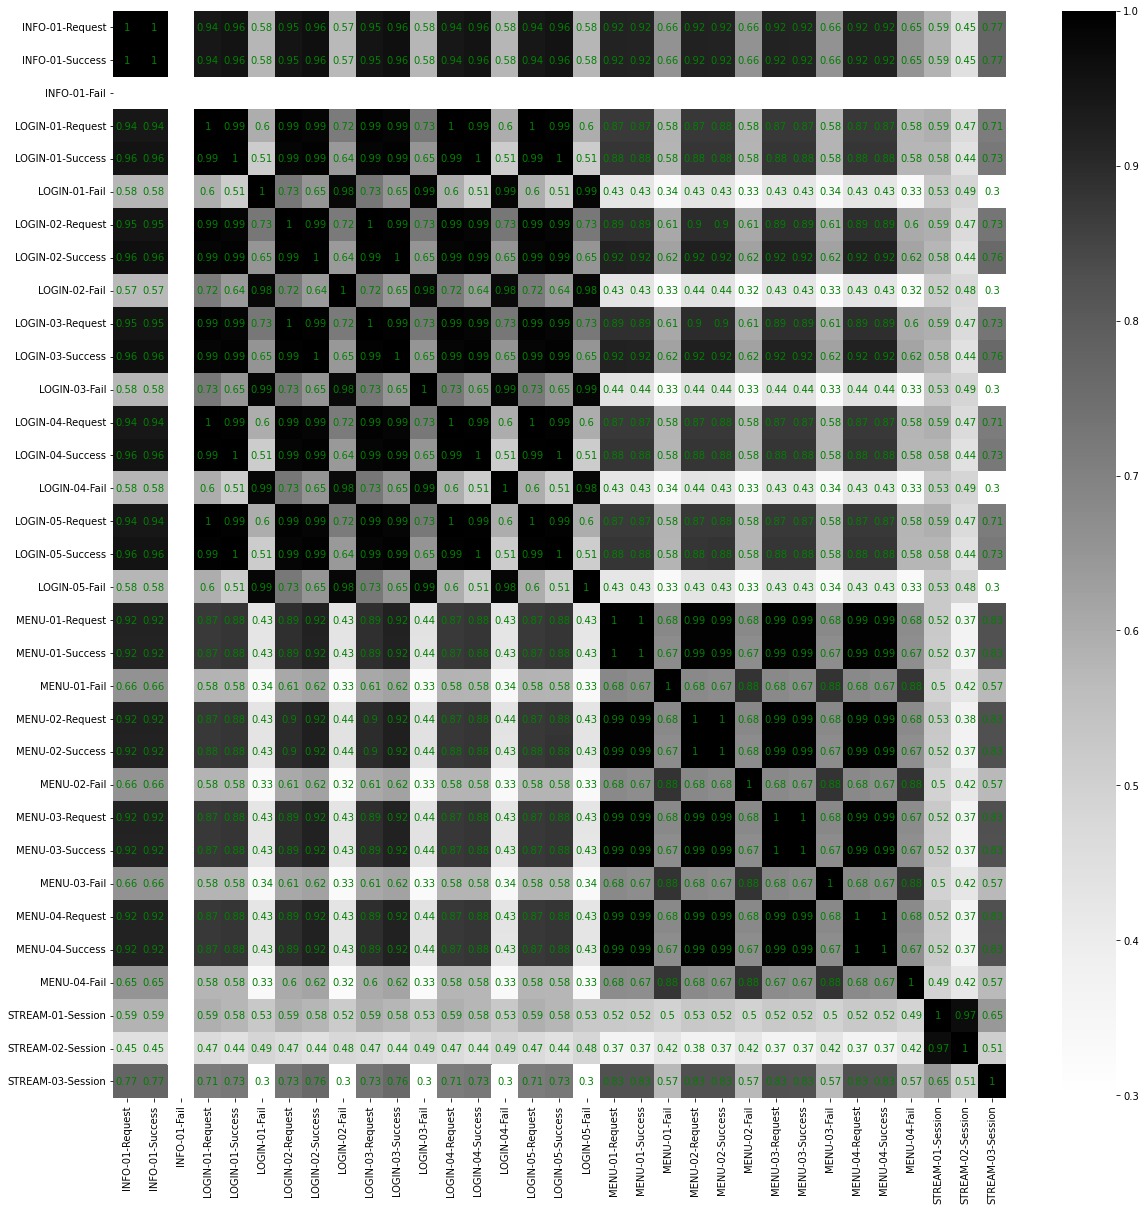

In [ ]:
import seaborn as sns

corr_df=train_media.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()

In [ ]:
media.isna().sum()

INFO-01-Request      17991
INFO-01-Success      17991
INFO-01-Fail         17991
LOGIN-01-Request       677
LOGIN-01-Success       677
LOGIN-01-Fail          677
LOGIN-02-Request     18049
LOGIN-02-Success     18049
LOGIN-02-Fail        18049
LOGIN-03-Request     18049
LOGIN-03-Success     18049
LOGIN-03-Fail        18049
LOGIN-04-Request       677
LOGIN-04-Success       677
LOGIN-04-Fail          677
LOGIN-05-Request       677
LOGIN-05-Success       677
LOGIN-05-Fail          677
MENU-01-Request        469
MENU-01-Success        469
MENU-01-Fail           469
MENU-02-Request        469
MENU-02-Success        469
MENU-02-Fail           469
MENU-03-Request        469
MENU-03-Success        469
MENU-03-Fail           469
MENU-04-Request        469
MENU-04-Success        469
MENU-04-Fail           469
STREAM-01-Session    31509
STREAM-02-Session    31510
STREAM-03-Session      458
dtype: int64

# 결측치 시각화

In [ ]:
pip install missingno

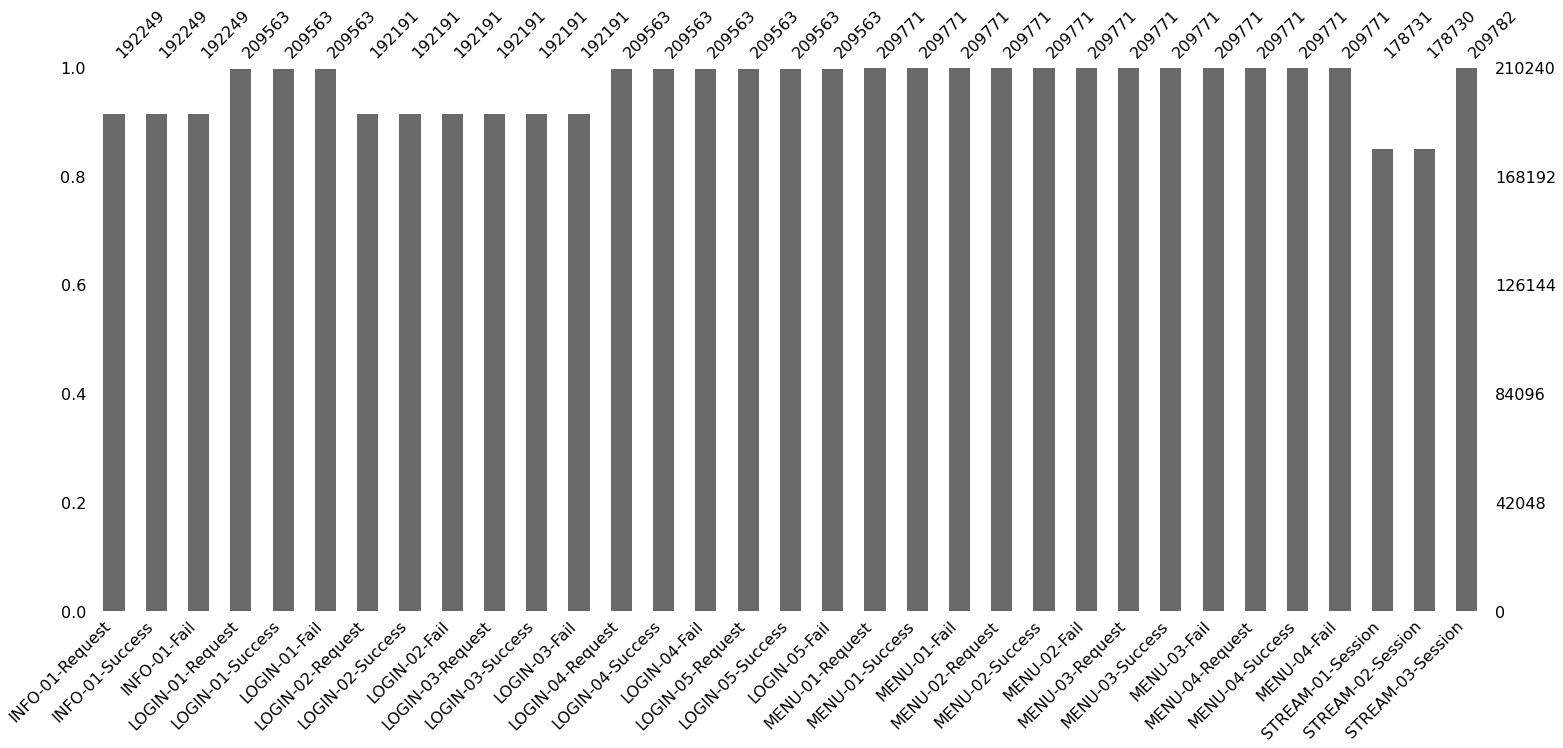

In [ ]:
import missingno as msno
msno.bar(media)

<Figure size 432x288 with 0 Axes>

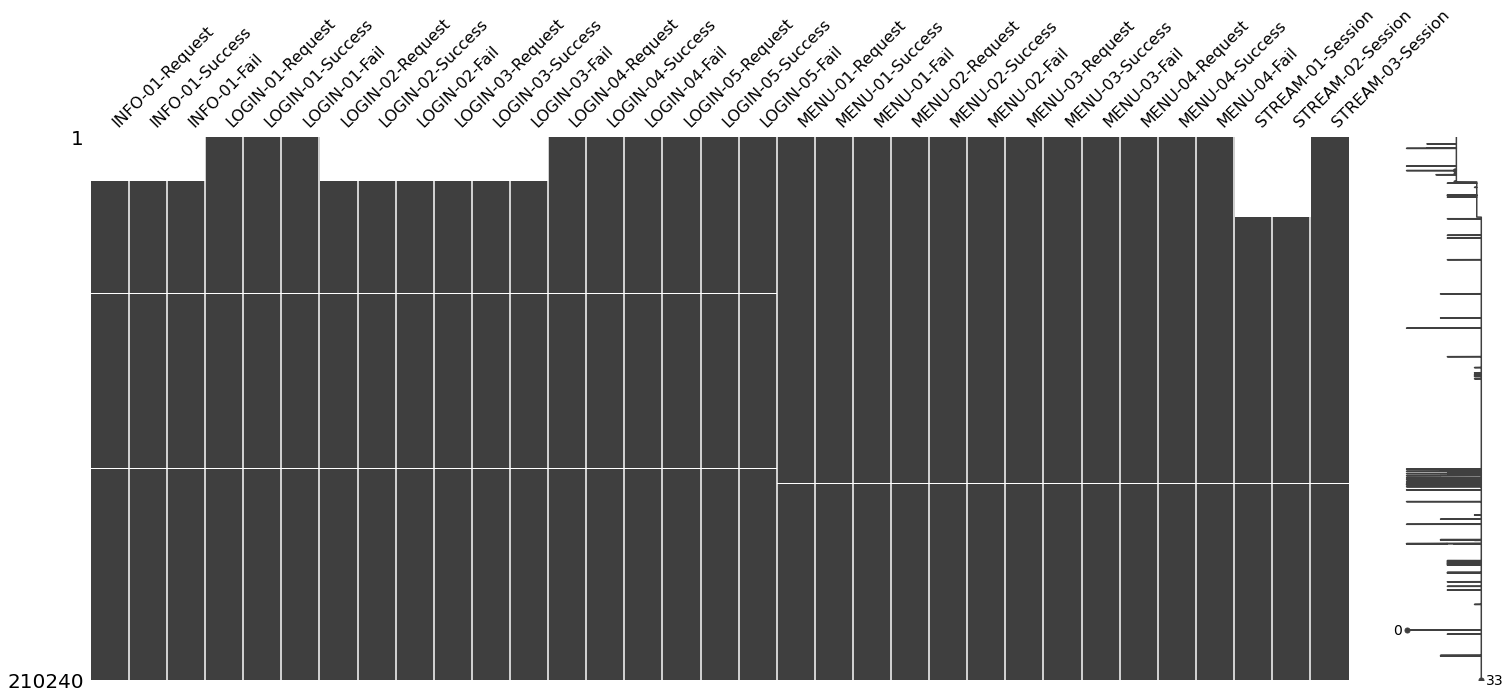

In [ ]:
plt.figure(1)
msno.matrix(media) # 오른쪽의 스파크라인은 데이터 완전성의 일반적인 모양을 요약하고 데이터세트에서 최대 및 최소 nullity가 있는 행을 나타냅니다.

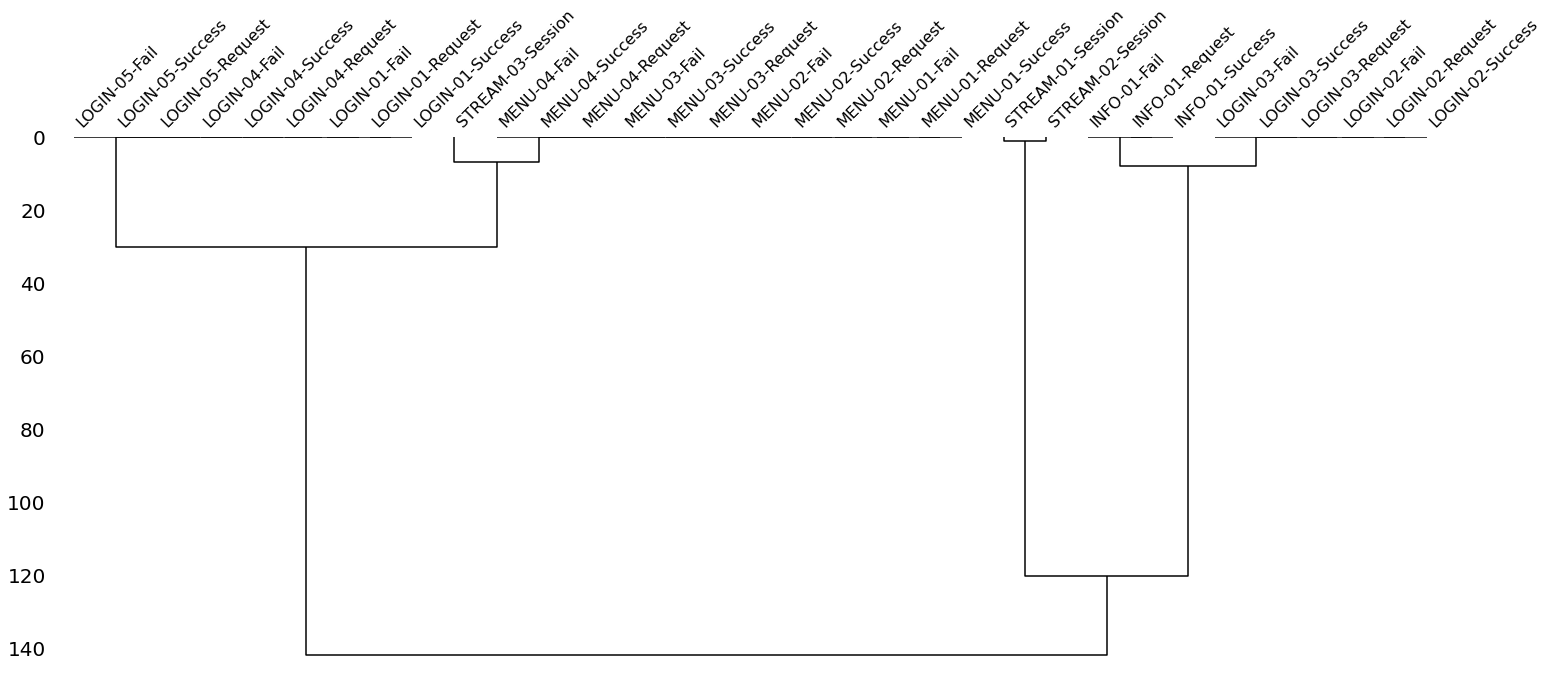

In [ ]:
msno.dendrogram(media)
#덴드로그램을 사용하면 변수 완성의 상관 관계를 보다 완벽하게 파악할 수 있으므로 상관 관계 히트맵에서 볼 수 있는 쌍별 추세보다 더 깊은 추세를 확인할 수 있습니다.
#덴드로그램은 계층적 클러스터링 알고리즘 ( 의 제공 scipy )을 사용하여 nullity 상관 관계(이진 거리로 측정)를 통해 변수를 서로 비닝합니다. 트리의 각 단계에서 나머지 클러스터의 거리를 최소화하는 조합에 따라 변수가 분할됩니다. 단조로운 변수 집합이 많을수록 전체 거리가 0에 더 가깝고 평균 거리(y축)가 0에 더 가깝습니다.
#이 그래프를 해석하려면 하향식 관점에서 읽으십시오. 0의 거리에서 함께 연결된 클러스터 잎은 서로의 존재를 완전히 예측합니다. 한 변수는 다른 변수가 채워질 때 항상 비어 있거나 항상 둘 다 채워지거나 둘 다 비어 있을 수 있습니다. 이 특정 예에서 덴드로그램은 필요하므로 모든 레코드에 존재하는 변수를 함께 붙입니다.

# linear 보간법

In [ ]:
linear_train=media.interpolate(limit_direction="both",method = 'linear')

In [ ]:
linear_train

,INFO-01-Request,INFO-01-Success,INFO-01-Fail,LOGIN-01-Request,LOGIN-01-Success,LOGIN-01-Fail,LOGIN-02-Request,LOGIN-02-Success,LOGIN-02-Fail,LOGIN-03-Request,...,MENU-02-Fail,MENU-03-Request,MENU-03-Success,MENU-03-Fail,MENU-04-Request,MENU-04-Success,MENU-04-Fail,STREAM-01-Session,STREAM-02-Session,STREAM-03-Session
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0.0,0.0,0.0,4405.0,4292.0,113.0,0.0,0.0,0.0,0.0,...,51.0,6477.0,6418.0,59.0,6518.0,6472.0,46.0,0.0,6.0,317.0
2017-01-01 00:05:00,0.0,0.0,0.0,2260.0,2208.0,52.0,0.0,0.0,0.0,0.0,...,21.0,2891.0,2860.0,31.0,2765.0,2747.0,18.0,0.0,6.0,195.0
2017-01-01 00:10:00,0.0,0.0,0.0,1648.0,1623.0,25.0,0.0,0.0,0.0,0.0,...,33.0,3884.0,3842.0,42.0,3990.0,3934.0,56.0,0.0,6.0,171.0
2017-01-01 00:15:00,0.0,0.0,0.0,1407.0,1387.0,20.0,0.0,0.0,0.0,0.0,...,30.0,2718.0,2685.0,33.0,2561.0,2525.0,36.0,0.0,6.0,158.0
2017-01-01 00:20:00,0.0,0.0,0.0,1374.0,1351.0,23.0,0.0,0.0,0.0,0.0,...,28.0,2450.0,2409.0,41.0,2389.0,2375.0,14.0,0.0,6.0,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:35:00,4988.0,4988.0,0.0,4081.0,3925.0,156.0,4076.0,3933.0,143.0,4079.0,...,42.0,5473.0,5432.0,41.0,5491.0,5443.0,48.0,193.0,192.0,198.0
2018-12-31 23:40:00,5807.0,5807.0,0.0,4322.0,4182.0,140.0,4325.0,4180.0,145.0,4326.0,...,33.0,6109.0,6076.0,33.0,6338.0,6282.0,56.0,198.0,238.0,225.0
2018-12-31 23:45:00,5716.0,5716.0,0.0,4531.0,4355.0,176.0,4528.0,4345.0,183.0,4522.0,...,48.0,6551.0,6520.0,31.0,6537.0,6487.0,50.0,192.0,191.0,232.0


In [ ]:
time_media=media.interpolate(method = 'time')

In [ ]:
time_media

,INFO-01-Request,INFO-01-Success,INFO-01-Fail,LOGIN-01-Request,LOGIN-01-Success,LOGIN-01-Fail,LOGIN-02-Request,LOGIN-02-Success,LOGIN-02-Fail,LOGIN-03-Request,...,MENU-02-Fail,MENU-03-Request,MENU-03-Success,MENU-03-Fail,MENU-04-Request,MENU-04-Success,MENU-04-Fail,STREAM-01-Session,STREAM-02-Session,STREAM-03-Session
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,NaN,NaN,NaN,4405.0,4292.0,113.0,NaN,NaN,NaN,NaN,...,51.0,6477.0,6418.0,59.0,6518.0,6472.0,46.0,NaN,NaN,317.0
2017-01-01 00:05:00,NaN,NaN,NaN,2260.0,2208.0,52.0,NaN,NaN,NaN,NaN,...,21.0,2891.0,2860.0,31.0,2765.0,2747.0,18.0,NaN,NaN,195.0
2017-01-01 00:10:00,NaN,NaN,NaN,1648.0,1623.0,25.0,NaN,NaN,NaN,NaN,...,33.0,3884.0,3842.0,42.0,3990.0,3934.0,56.0,NaN,NaN,171.0
2017-01-01 00:15:00,NaN,NaN,NaN,1407.0,1387.0,20.0,NaN,NaN,NaN,NaN,...,30.0,2718.0,2685.0,33.0,2561.0,2525.0,36.0,NaN,NaN,158.0
2017-01-01 00:20:00,NaN,NaN,NaN,1374.0,1351.0,23.0,NaN,NaN,NaN,NaN,...,28.0,2450.0,2409.0,41.0,2389.0,2375.0,14.0,NaN,NaN,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:35:00,4988.0,4988.0,0.0,4081.0,3925.0,156.0,4076.0,3933.0,143.0,4079.0,...,42.0,5473.0,5432.0,41.0,5491.0,5443.0,48.0,193.0,192.0,198.0
2018-12-31 23:40:00,5807.0,5807.0,0.0,4322.0,4182.0,140.0,4325.0,4180.0,145.0,4326.0,...,33.0,6109.0,6076.0,33.0,6338.0,6282.0,56.0,198.0,238.0,225.0
2018-12-31 23:45:00,5716.0,5716.0,0.0,4531.0,4355.0,176.0,4528.0,4345.0,183.0,4522.0,...,48.0,6551.0,6520.0,31.0,6537.0,6487.0,50.0,192.0,191.0,232.0


In [ ]:
time_media.isna().sum()

INFO-01-Request      17484
INFO-01-Success      17484
INFO-01-Fail         17484
LOGIN-01-Request         0
LOGIN-01-Success         0
LOGIN-01-Fail            0
LOGIN-02-Request     17483
LOGIN-02-Success     17483
LOGIN-02-Fail        17483
LOGIN-03-Request     17483
LOGIN-03-Success     17483
LOGIN-03-Fail        17483
LOGIN-04-Request         0
LOGIN-04-Success         0
LOGIN-04-Fail            0
LOGIN-05-Request         0
LOGIN-05-Success         0
LOGIN-05-Fail            0
MENU-01-Request          0
MENU-01-Success          0
MENU-01-Fail             0
MENU-02-Request          0
MENU-02-Success          0
MENU-02-Fail             0
MENU-03-Request          0
MENU-03-Success          0
MENU-03-Fail             0
MENU-04-Request          0
MENU-04-Success          0
MENU-04-Fail             0
STREAM-01-Session    31118
STREAM-02-Session    31119
STREAM-03-Session        0
dtype: int64

In [ ]:
# 결측치 없는 값만 추출

not_missing_data = time_media.dropna(axis=0)
not_missing_data

,INFO-01-Request,INFO-01-Success,INFO-01-Fail,LOGIN-01-Request,LOGIN-01-Success,LOGIN-01-Fail,LOGIN-02-Request,LOGIN-02-Success,LOGIN-02-Fail,LOGIN-03-Request,...,MENU-02-Fail,MENU-03-Request,MENU-03-Success,MENU-03-Fail,MENU-04-Request,MENU-04-Success,MENU-04-Fail,STREAM-01-Session,STREAM-02-Session,STREAM-03-Session
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-04-19 01:15:00,462.0,462.0,0.0,381.0,377.0,4.0,379.0,374.0,5.0,380.0,...,8.0,1432.0,1425.0,7.0,1343.0,1331.0,12.0,0.0,6.0,124.0
2017-04-19 01:20:00,402.0,402.0,0.0,361.0,358.0,3.0,363.0,351.0,12.0,362.0,...,10.0,1342.0,1330.0,12.0,1292.0,1278.0,14.0,0.0,6.0,121.0
2017-04-19 01:25:00,420.0,420.0,0.0,344.0,340.0,4.0,343.0,340.0,3.0,343.0,...,8.0,1382.0,1373.0,9.0,1172.0,1157.0,15.0,0.0,6.0,131.0
2017-04-19 01:30:00,377.0,377.0,0.0,329.0,321.0,8.0,330.0,318.0,12.0,332.0,...,9.0,1358.0,1346.0,12.0,1374.0,1365.0,9.0,0.0,6.0,100.0
2017-04-19 01:35:00,302.0,302.0,0.0,301.0,297.0,4.0,299.0,295.0,4.0,299.0,...,11.0,1266.0,1257.0,9.0,1207.0,1191.0,16.0,0.0,6.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:35:00,4988.0,4988.0,0.0,4081.0,3925.0,156.0,4076.0,3933.0,143.0,4079.0,...,42.0,5473.0,5432.0,41.0,5491.0,5443.0,48.0,193.0,192.0,198.0
2018-12-31 23:40:00,5807.0,5807.0,0.0,4322.0,4182.0,140.0,4325.0,4180.0,145.0,4326.0,...,33.0,6109.0,6076.0,33.0,6338.0,6282.0,56.0,198.0,238.0,225.0
2018-12-31 23:45:00,5716.0,5716.0,0.0,4531.0,4355.0,176.0,4528.0,4345.0,183.0,4522.0,...,48.0,6551.0,6520.0,31.0,6537.0,6487.0,50.0,192.0,191.0,232.0


# 다변수 특성 대치

In [ ]:
from sklearn.experimental import enable_iterative_imputer #다변수 특성 대치
from sklearn.impute import IterativeImputer
import numpy as np
imp = IterativeImputer(missing_values=np.nan)
imp.fit(not_missing_data)
iterativeimputer = imp.transform(media)

In [ ]:
import numpy as np

iterativeimputer_data=pd.DataFrame(np.array(iterativeimputer),columns=media.columns,index=media.index)  # https://scikit-learn.org/stable/modules/impute.html
iterativeimputer_data

,INFO-01-Request,INFO-01-Success,INFO-01-Fail,LOGIN-01-Request,LOGIN-01-Success,LOGIN-01-Fail,LOGIN-02-Request,LOGIN-02-Success,LOGIN-02-Fail,LOGIN-03-Request,...,MENU-02-Fail,MENU-03-Request,MENU-03-Success,MENU-03-Fail,MENU-04-Request,MENU-04-Success,MENU-04-Fail,STREAM-01-Session,STREAM-02-Session,STREAM-03-Session
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,21151.325233,152223.325233,0.0,4405.0,4292.0,113.0,2.422600e+22,3.895889e+23,-1.110671e+24,-8.482281e+37,...,51.0,6477.0,6418.0,59.0,6518.0,6472.0,46.0,-5.860237e+36,-6.196878e+37,317.0
2017-01-01 00:05:00,4767.325233,29343.325233,0.0,2260.0,2208.0,52.0,4.542375e+21,7.304792e+22,-2.082509e+23,-1.590428e+37,...,21.0,2891.0,2860.0,31.0,2765.0,2747.0,18.0,-1.098794e+36,-1.161915e+37,195.0
2017-01-01 00:10:00,-3424.674767,-36192.674767,0.0,1648.0,1623.0,25.0,-6.056500e+21,-9.739723e+22,2.776678e+23,2.120570e+37,...,33.0,3884.0,3842.0,42.0,3990.0,3934.0,56.0,1.465059e+36,1.549220e+37,171.0
2017-01-01 00:15:00,-7520.674767,-64864.674767,0.0,1407.0,1387.0,20.0,-1.059888e+22,-1.704451e+23,4.859187e+23,3.710998e+37,...,30.0,2718.0,2685.0,33.0,2561.0,2525.0,36.0,2.563854e+36,2.711134e+37,158.0
2017-01-01 00:20:00,671.325233,671.325233,0.0,1374.0,1351.0,23.0,8.982630e+02,-1.347684e+04,5.533510e+04,4.661617e+18,...,28.0,2450.0,2409.0,41.0,2389.0,2375.0,14.0,3.220617e+17,3.405626e+18,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:35:00,4988.000000,4988.000000,0.0,4081.0,3925.0,156.0,4.076000e+03,3.933000e+03,1.430000e+02,4.079000e+03,...,42.0,5473.0,5432.0,41.0,5491.0,5443.0,48.0,1.930000e+02,1.920000e+02,198.0
2018-12-31 23:40:00,5807.000000,5807.000000,0.0,4322.0,4182.0,140.0,4.325000e+03,4.180000e+03,1.450000e+02,4.326000e+03,...,33.0,6109.0,6076.0,33.0,6338.0,6282.0,56.0,1.980000e+02,2.380000e+02,225.0
2018-12-31 23:45:00,5716.000000,5716.000000,0.0,4531.0,4355.0,176.0,4.528000e+03,4.345000e+03,1.830000e+02,4.522000e+03,...,48.0,6551.0,6520.0,31.0,6537.0,6487.0,50.0,1.920000e+02,1.910000e+02,232.0


In [ ]:
from sklearn.experimental import enable_iterative_imputer #다변수 특성 대치
from sklearn.impute import KNNImputer 
imp = KNNImputer(n_neighbors=3)
knn_imputer = imp.fit_transform(time_media)
knn_imputer

array([[4290.        , 4290.        ,    0.        , ...,  170.33333333,
         181.66666667,  317.        ],
       [1319.        , 1319.        ,    0.        , ...,  131.        ,
         136.66666667,  195.        ],
       [1270.33333333, 1270.33333333,    0.        , ...,  193.33333333,
         190.        ,  171.        ],
       ...,
       [5716.        , 5716.        ,    0.        , ...,  192.        ,
         191.        ,  232.        ],
       [5952.        , 5952.        ,    0.        , ...,  194.        ,
         192.        ,  261.        ],
       [5781.        , 5781.        ,    0.        , ...,  163.        ,
         169.        ,  270.        ]])

In [ ]:
knn_imputer_data=pd.DataFrame(np.array(knn_imputer),columns=media.columns,index=media.index)  # https://scikit-learn.org/stable/modules/impute.html
knn_imputer_data

,INFO-01-Request,INFO-01-Success,INFO-01-Fail,LOGIN-01-Request,LOGIN-01-Success,LOGIN-01-Fail,LOGIN-02-Request,LOGIN-02-Success,LOGIN-02-Fail,LOGIN-03-Request,...,MENU-02-Fail,MENU-03-Request,MENU-03-Success,MENU-03-Fail,MENU-04-Request,MENU-04-Success,MENU-04-Fail,STREAM-01-Session,STREAM-02-Session,STREAM-03-Session
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,4290.000000,4290.000000,0.0,4405.0,4292.0,113.0,4317.000000,4175.000000,142.000000,4314.000000,...,51.0,6477.0,6418.0,59.0,6518.0,6472.0,46.0,170.333333,181.666667,317.0
2017-01-01 00:05:00,1319.000000,1319.000000,0.0,2260.0,2208.0,52.0,2263.333333,2197.000000,66.333333,2263.333333,...,21.0,2891.0,2860.0,31.0,2765.0,2747.0,18.0,131.000000,136.666667,195.0
2017-01-01 00:10:00,1270.333333,1270.333333,0.0,1648.0,1623.0,25.0,1629.000000,1589.666667,39.333333,1630.666667,...,33.0,3884.0,3842.0,42.0,3990.0,3934.0,56.0,193.333333,190.000000,171.0
2017-01-01 00:15:00,859.333333,859.333333,0.0,1407.0,1387.0,20.0,1413.000000,1381.666667,31.333333,1413.333333,...,30.0,2718.0,2685.0,33.0,2561.0,2525.0,36.0,241.000000,294.666667,158.0
2017-01-01 00:20:00,834.000000,834.000000,0.0,1374.0,1351.0,23.0,1388.000000,1351.000000,37.000000,1387.666667,...,28.0,2450.0,2409.0,41.0,2389.0,2375.0,14.0,202.666667,252.333333,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:35:00,4988.000000,4988.000000,0.0,4081.0,3925.0,156.0,4076.000000,3933.000000,143.000000,4079.000000,...,42.0,5473.0,5432.0,41.0,5491.0,5443.0,48.0,193.000000,192.000000,198.0
2018-12-31 23:40:00,5807.000000,5807.000000,0.0,4322.0,4182.0,140.0,4325.000000,4180.000000,145.000000,4326.000000,...,33.0,6109.0,6076.0,33.0,6338.0,6282.0,56.0,198.000000,238.000000,225.0
2018-12-31 23:45:00,5716.000000,5716.000000,0.0,4531.0,4355.0,176.0,4528.000000,4345.000000,183.000000,4522.000000,...,48.0,6551.0,6520.0,31.0,6537.0,6487.0,50.0,192.000000,191.000000,232.0


In [ ]:
knn_imputer_data.iloc[:105120,:].to_csv('/content/drive/MyDrive/dmp/train.csv',index=True)
knn_imputer_data.iloc[105121:,:].to_csv('/content/drive/MyDrive/dmp/test.csv',index=True)

In [ ]:
imp = KNNImputer(n_neighbors=3)
knn_imputer2 = imp.fit_transform(media)
knn_imputer2

array([[4290.        , 4290.        ,    0.        , ...,  170.33333333,
         181.66666667,  317.        ],
       [1566.        , 1566.        ,    0.        , ...,  131.        ,
         136.66666667,  195.        ],
       [1255.66666667, 1255.66666667,    0.        , ...,  219.33333333,
         217.33333333,  171.        ],
       ...,
       [5716.        , 5716.        ,    0.        , ...,  192.        ,
         191.        ,  232.        ],
       [5952.        , 5952.        ,    0.        , ...,  194.        ,
         192.        ,  261.        ],
       [5781.        , 5781.        ,    0.        , ...,  163.        ,
         169.        ,  270.        ]])

In [ ]:
knn_imputer_data2=pd.DataFrame(np.array(knn_imputer2),columns=media.columns,index=media.index)  # https://scikit-learn.org/stable/modules/impute.html
knn_imputer_data2

,INFO-01-Request,INFO-01-Success,INFO-01-Fail,LOGIN-01-Request,LOGIN-01-Success,LOGIN-01-Fail,LOGIN-02-Request,LOGIN-02-Success,LOGIN-02-Fail,LOGIN-03-Request,...,MENU-02-Fail,MENU-03-Request,MENU-03-Success,MENU-03-Fail,MENU-04-Request,MENU-04-Success,MENU-04-Fail,STREAM-01-Session,STREAM-02-Session,STREAM-03-Session
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,4290.000000,4290.000000,0.0,4405.0,4292.0,113.0,4317.000000,4175.000000,142.000000,4314.000000,...,51.0,6477.0,6418.0,59.0,6518.0,6472.0,46.0,170.333333,181.666667,317.0
2017-01-01 00:05:00,1566.000000,1566.000000,0.0,2260.0,2208.0,52.0,2266.000000,2223.000000,43.000000,2267.000000,...,21.0,2891.0,2860.0,31.0,2765.0,2747.0,18.0,131.000000,136.666667,195.0
2017-01-01 00:10:00,1255.666667,1255.666667,0.0,1648.0,1623.0,25.0,1655.333333,1605.000000,50.333333,1657.000000,...,33.0,3884.0,3842.0,42.0,3990.0,3934.0,56.0,219.333333,217.333333,171.0
2017-01-01 00:15:00,987.333333,987.333333,0.0,1407.0,1387.0,20.0,1416.333333,1375.666667,40.666667,1416.333333,...,30.0,2718.0,2685.0,33.0,2561.0,2525.0,36.0,272.000000,323.333333,158.0
2017-01-01 00:20:00,1094.333333,1094.333333,0.0,1374.0,1351.0,23.0,1378.000000,1339.333333,38.666667,1379.666667,...,28.0,2450.0,2409.0,41.0,2389.0,2375.0,14.0,248.333333,298.333333,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:35:00,4988.000000,4988.000000,0.0,4081.0,3925.0,156.0,4076.000000,3933.000000,143.000000,4079.000000,...,42.0,5473.0,5432.0,41.0,5491.0,5443.0,48.0,193.000000,192.000000,198.0
2018-12-31 23:40:00,5807.000000,5807.000000,0.0,4322.0,4182.0,140.0,4325.000000,4180.000000,145.000000,4326.000000,...,33.0,6109.0,6076.0,33.0,6338.0,6282.0,56.0,198.000000,238.000000,225.0
2018-12-31 23:45:00,5716.000000,5716.000000,0.0,4531.0,4355.0,176.0,4528.000000,4345.000000,183.000000,4522.000000,...,48.0,6551.0,6520.0,31.0,6537.0,6487.0,50.0,192.000000,191.000000,232.0


In [ ]:
knn_imputer_data2.iloc[:105120,:].to_csv('/content/drive/MyDrive/dmp/train2.csv',index=True)
knn_imputer_data2.iloc[105121:,:].to_csv('/content/drive/MyDrive/dmp/test2.csv',index=True)